In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('standard2.csv')

In [3]:
data.columns = data.iloc[0]
data = data.iloc[1:]
data
df = pd.DataFrame(data)

In [4]:
df.head()

,Squad,# Pl,Age,Poss,MP,Starts,Min,90s,Gls,Ast,...,G+A-PK,xG,npxG,xAG,npxG+xAG,xG,xAG,xG+xAG,npxG,npxG+xAG
1,ar Argentina,21,28.7,65,4,44,360,4,7,5,...,2.75,7.6,6.2,4.3,10.5,1.9,1.07,2.97,1.55,2.62
2,au Australia,20,28.7,37.8,4,44,360,4,3,3,...,1.5,2.3,2.3,1.9,4.2,0.58,0.48,1.06,0.58,1.06
3,be Belgium,20,30.6,57,3,33,270,3,1,1,...,0.67,4.7,4.7,3.8,8.5,1.57,1.27,2.85,1.57,2.85
4,br Brazil,26,28.4,57.8,4,44,360,4,7,5,...,2.75,9.4,8.7,6.5,15.2,2.36,1.63,3.99,2.17,3.79
5,cm Cameroon,22,28,41.7,3,33,270,3,4,4,...,2.67,3.4,3.4,2,5.4,1.14,0.66,1.8,1.14,1.8


In [13]:
for i in (df['Squad'].astype(str)):
    g = i[3:]
    df['Squad'] = df['Squad'].str.replace(i,g)
df.head()

,Squad,# Pl,Age,Poss,MP,Starts,Min,90s,Gls,Ast,...,G+A-PK,xG,npxG,xAG,npxG+xAG,xG,xAG,xG+xAG,npxG,npxG+xAG
1,entina,21,28.7,65,4,44,360,4,7,5,...,2.75,7.6,6.2,4.3,10.5,1.9,1.07,2.97,1.55,2.62
2,tralia,20,28.7,37.8,4,44,360,4,3,3,...,1.5,2.3,2.3,1.9,4.2,0.58,0.48,1.06,0.58,1.06
3,gium,20,30.6,57,3,33,270,3,1,1,...,0.67,4.7,4.7,3.8,8.5,1.57,1.27,2.85,1.57,2.85
4,zil,26,28.4,57.8,4,44,360,4,7,5,...,2.75,9.4,8.7,6.5,15.2,2.36,1.63,3.99,2.17,3.79
5,eroon,22,28,41.7,3,33,270,3,4,4,...,2.67,3.4,3.4,2,5.4,1.14,0.66,1.8,1.14,1.8


In [6]:
knockout_data = df.loc[df['MP'] == '4'] 

In [7]:
knockout_data = knockout_data.astype({'Poss':'float'})
knockout_data = knockout_data.sort_values(by=['Poss'],ascending=False).reset_index()
knockout_data = knockout_data.drop(['index'], axis=1)

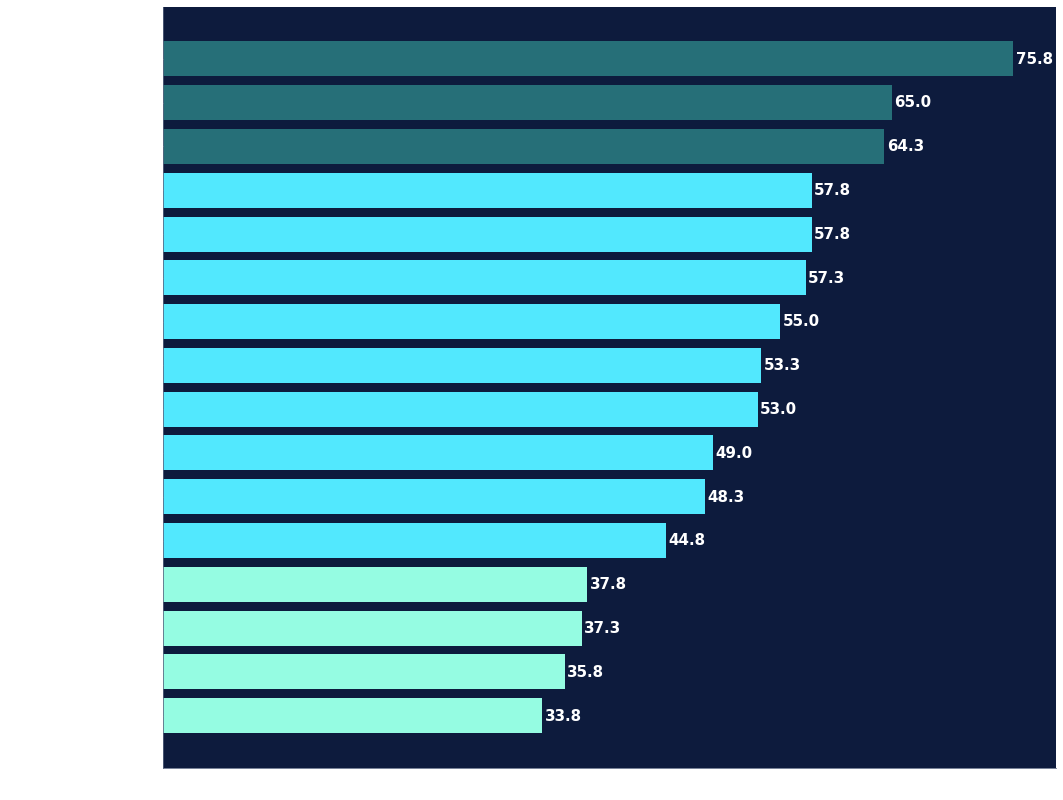

In [8]:
fig, ax = plt.subplots(figsize =(16, 14))
ax.barh(knockout_data['Squad'],knockout_data['Poss'],color=['#266f78','#266f78','#266f78', '#52e8fe', '#52e8fe', '#52e8fe', '#52e8fe','#52e8fe','#52e8fe','#52e8fe','#52e8fe','#52e8fe','#95fce2','#95fce2','#95fce2','#95fce2'],height=0.8)
for s in ['top', 'right']:
    ax.spines[s].set_visible(False)
ax.invert_yaxis()   
for s in ['bottom','left']:
    ax.spines[s].set_edgecolor('#586480')
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 15,
             color ='white',
             weight="bold")
ax.tick_params(axis='y', labelsize=20 ,colors='white')
ax.tick_params(axis='x', labelsize=18, colors='white')
ax.set_facecolor("#0d1b3d")
plt.savefig('test1.jpg')

In [9]:
knockout_data.columns.values[15] = "GlsNinety"
knockout_data = knockout_data.astype({'Gls':'int'})
knockout_data = knockout_data.sort_values(by=['Gls'],ascending=False).reset_index()
knockout_data = knockout_data.drop(['index'], axis=1)

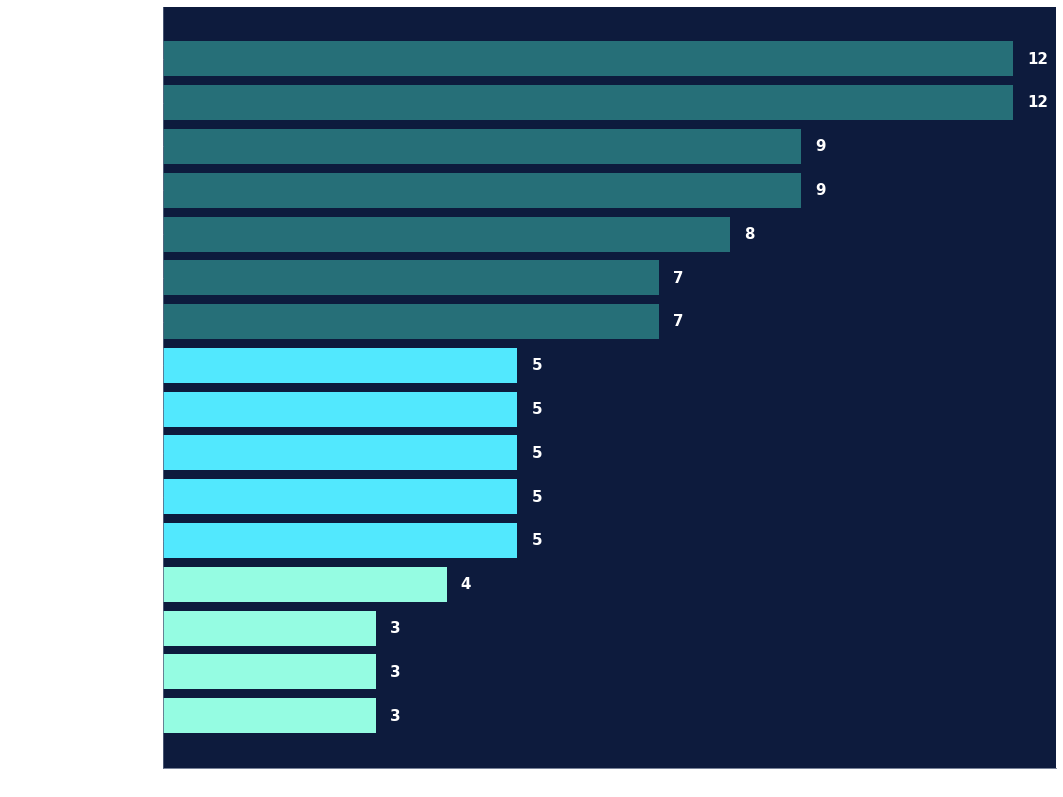

In [10]:
fig, ax = plt.subplots(figsize =(16, 14))
ax.barh(knockout_data['Squad'],knockout_data['Gls'],color=['#266f78','#266f78','#266f78', '#266f78', '#266f78', '#266f78', '#266f78','#52e8fe','#52e8fe','#52e8fe','#52e8fe','#52e8fe','#95fce2','#95fce2','#95fce2','#95fce2'],height=0.8)
for s in ['top', 'right']:
    ax.spines[s].set_visible(False)
ax.invert_yaxis()   
for s in ['bottom','left']:
    ax.spines[s].set_edgecolor('#586480')
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 15,
             color ='white',
            weight="bold")
ax.tick_params(axis='y', labelsize=20 ,colors='white')
ax.tick_params(axis='x', labelsize=16, colors='white')
ax.set_facecolor("#0d1b3d")
plt.savefig('test3.jpg')

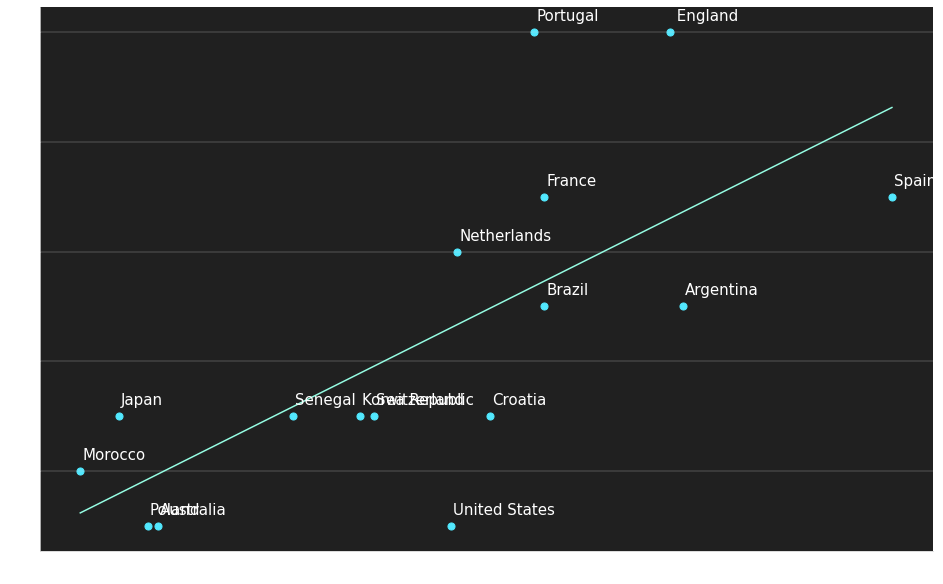

<Figure size 432x288 with 0 Axes>

In [11]:
fig, ax = plt.subplots(figsize =(16, 10))
plt.scatter(x=knockout_data['Poss'], y=knockout_data['Gls'],color='#52e8fe',s=50)
x=knockout_data['Poss']
y=knockout_data['Gls']
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)),color="#95fce2")
for s in ['top', 'right']:
    ax.spines[s].set_visible(False)
ax.set_facecolor("#202020")
for s in ['left','bottom']:
    ax.spines[s].set_edgecolor('lightgrey')
ax.tick_params(axis='y', labelsize=20 ,colors='white')
ax.tick_params(axis='x', labelsize=20 ,colors='white')
for i, label in enumerate(knockout_data['Squad']):
    plt.annotate(label, (x[i] + 0.1, y[i] + 0.2),color="white",fontsize=15)
plt.grid(axis = 'y',color = 'lightgrey',linewidth=0.3)
plt.show()
plt.savefig('test5.jpg')